In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import os
import sys
sys.path.append('/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/utils')
from pp_utils import *
from plot_utils import *
from mTRF_utils import *
from midi_utils import *
from update_sub_lists import*
from ERP_utils import *

In [35]:
keystroke_file = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/mapchange_csv_corrected/mapchange_keystrokes_post_08.csv'

In [15]:
def generate_sv_onset(file):
    """ 
    Generates a support vector for mTRF analyses
    """
    data = pd.read_csv(file)
    ktimes = data['time']
    sv = np.zeros(76800) #length of the 10min file at 128 hz
    sv[ktimes] = 1

    return sv

sv = generate_sv(keystroke_file)

In [21]:
def generate_sv_firsts(file):
    data = pd.read_csv(file)

    ftimes = data[data['type'] == 'first']['time']
    otimes = data[data['type'] == 'other']['time']

    sv = np.zeros(76800) #length of the 10min file at 128 hz
    
    sv[ftimes] = 1
    sv[otimes] = 0.8

    return sv

fsv = generate_sv_firsts(keystroke_file)

In [36]:

good_listen_subjects, good_motor_subjects,good_error_subjects,musicians,nonmusicians = load_subject_lists_LME()
subjects_to_process = good_error_subjects


In [24]:
sv_path = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/mtrf_error_surprise/sv'
for sub in subjects_to_process:

    sv_data = pd.DataFrame({
        'onsets':sv,
        'firsts': fsv
    })

    sv_data.to_csv(os.path.join(sv_path, ))

In [25]:
sv_data.to_csv('sv_data_08.csv')

(0.0, 10000.0)

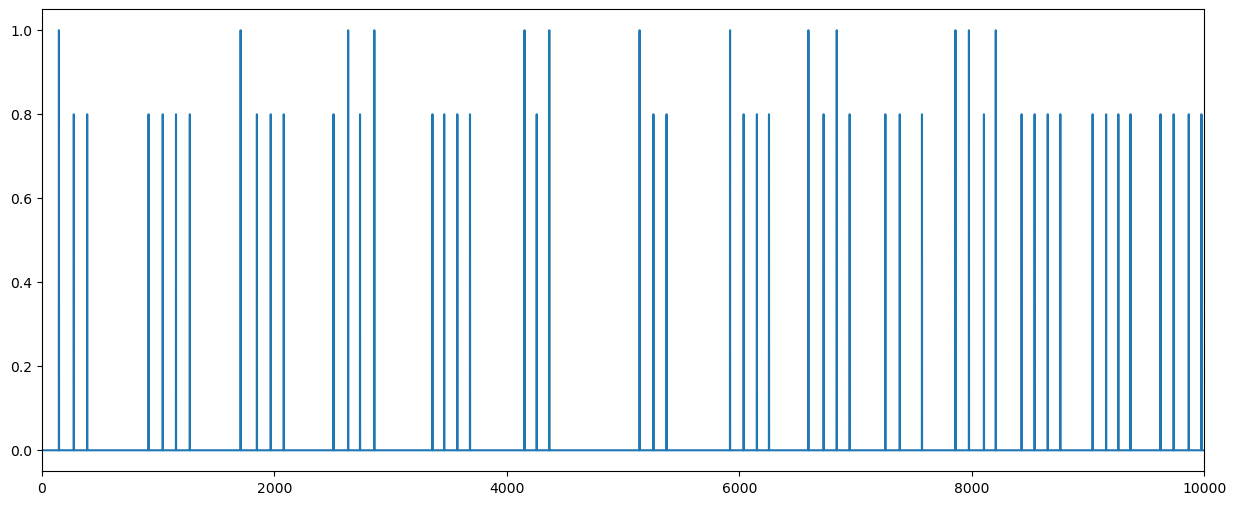

In [22]:
plt.figure(figsize = (15,6))
plt.plot(fsv)
plt.xlim(0,10000)